<a href="https://colab.research.google.com/github/rahiakela/feature-extraction-and-image-processing-for-computer-vision/blob/master/3-image_processing/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing

## Setup

In [ ]:
#Set module functions
from ImageUtilities import imageReadL, showImageL, createVectorI, createImageL
from PlotUtilities import plotHistogram

# Iteration
from timeit import itertools
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Image Histogram

The intensity histogram shows how individual brightness levels are occupied in an image; the image contrast is measured by the range of brightness levels. The histogram plots the number of pixels with a particular brightness level against the brightness level.

For 8-bit pixels, the brightness ranges from zero (black) to 255 (white).

Note that the image contains many light grey pixels that produce the wide lower peak in the histogram. If the image was darker, overall, the histogram would be concentrated towards black. If the image was brighter, but with lower contrast, then the histogram would be thinner and concentrated near the whiter brightness levels.




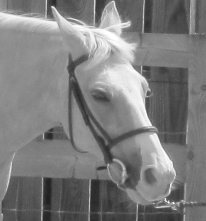

In [ ]:
imageName = "Horse.png"
scale = 1.0
translation = 0.0

# Read image into array
inputImage, width, height  = imageReadL(imageName)
outputImage = Image.fromarray(inputImage, 'L')
outputImage

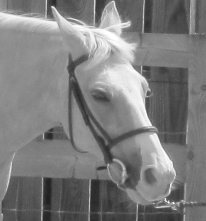

In [ ]:
# Transform the image
for x, y in itertools.product(range(0, width), range(0, height)):
  b = int(scale * float(inputImage[y, x]) + translation)
  inputImage[y, x] = max(0, min(b, 255))
Image.fromarray(inputImage, 'L')

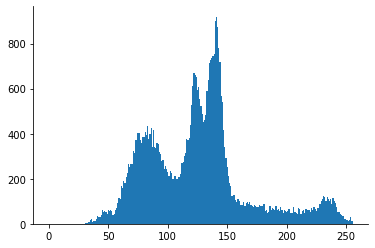

In [ ]:
# Vector of integers values to store the number of times a pixel value is repeated
outputHistogram = createVectorI(256)

# Get the number of times a pixel value is found in the image
for x, y in itertools.product(range(0, width), range(0, height)):
  pixelValue = inputImage[y, x]
  outputHistogram[pixelValue] += 1

# Plot histogram
plotHistogram(outputHistogram)

This histogramshows us that we have not used all available grey levels. Accordingly, we can stretch the image to use them all, and the image would become clearer. This is essentially cosmetic attention to make the image’s appearance better.

## Point operators